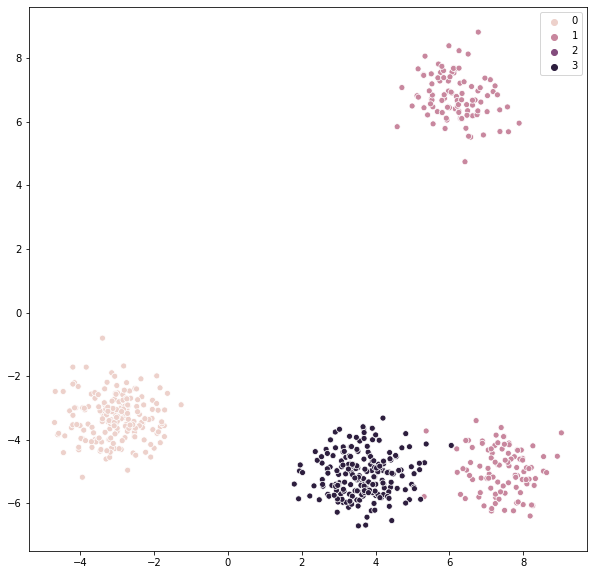

In [1]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

X,y = make_blobs(n_samples=np.array([200,100,100,100,100]),
                 n_features=2,
                 centers=None,
                 cluster_std=0.7,
                 center_box=(-10,10),
                 shuffle=False,
                 random_state=None)

temp = np.array(y)
temp[temp==4] = 3
temp[temp==2] = 1
y = list(temp)
f,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(*X.T,hue=y)
yl = plt.ylim()
xl = plt.xlim()

In [2]:
from sklearn_lvq import RslvqModel, GlvqModel, GrlvqModel

rslvq = RslvqModel(prototypes_per_class=1,
                  initial_prototypes=None,
                  sigma=0.7,
                  max_iter=10000,
                  gtol=1e-7,
                  display=False,
                  random_state=None).fit(X,y)

glvq = GlvqModel(prototypes_per_class=1,
                 initial_prototypes=None,
                 max_iter=10000,
                 gtol=1e-7,
                 beta=2,
                 C=None,
                 display=False,
                 random_state=None).fit(X,y)

grlvq = GrlvqModel(prototypes_per_class=1,
                  initial_prototypes=None,
                  initial_relevances=None,
                  max_iter=10000,
                  gtol=1e-7,
                  beta=2,
                  C=None,
                  display=False,
                  random_state=None).fit(X,y)

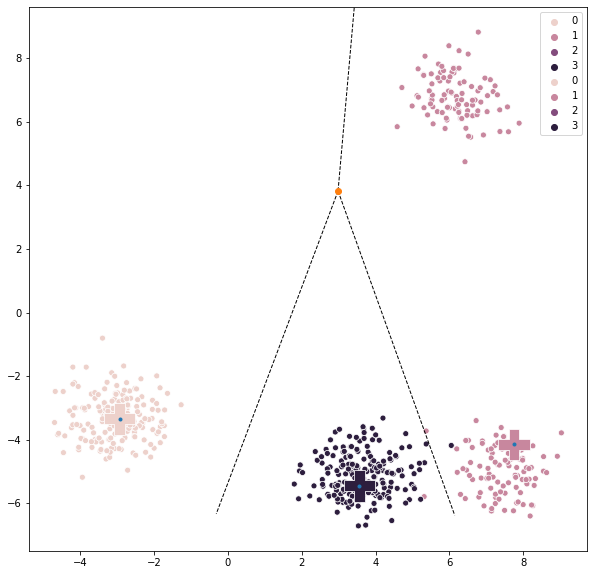

0.9966666666666667

In [3]:
f,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(*X.T,hue=y)
sns.scatterplot(*glvq.w_.T,hue=glvq.c_w_, marker='P',s=1000)
yl = plt.ylim()
xl = plt.xlim()
vor = Voronoi(glvq.w_)
voronoi_plot_2d(vor, show_points=True, show_vertices=True,ax=ax)
ax.set(ylim=yl,xlim=xl)
plt.show()
accuracy_score(glvq.predict(X),y)


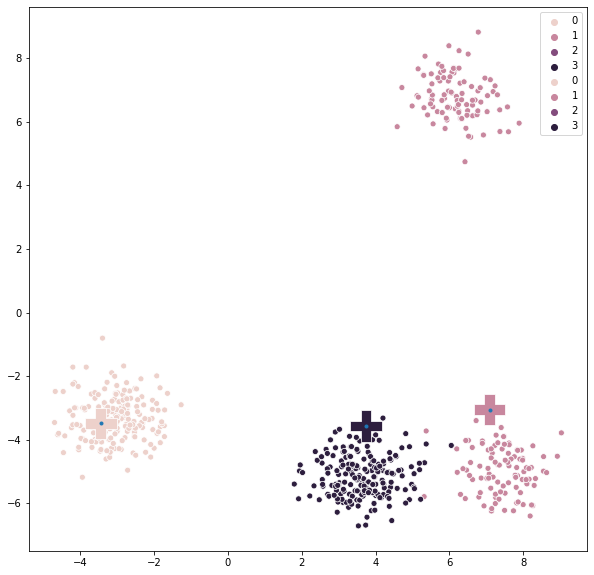

0.995

In [4]:
f,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(*X.T,hue=y)
sns.scatterplot(*rslvq.w_.T,hue=rslvq.c_w_, marker='P',s=1000)
yl = plt.ylim()
xl = plt.xlim()
vor = Voronoi(rslvq.w_)
voronoi_plot_2d(vor, show_points=True, show_vertices=True,ax=ax)
ax.set(ylim=yl,xlim=xl)
plt.show()
accuracy_score(rslvq.predict(X),y)

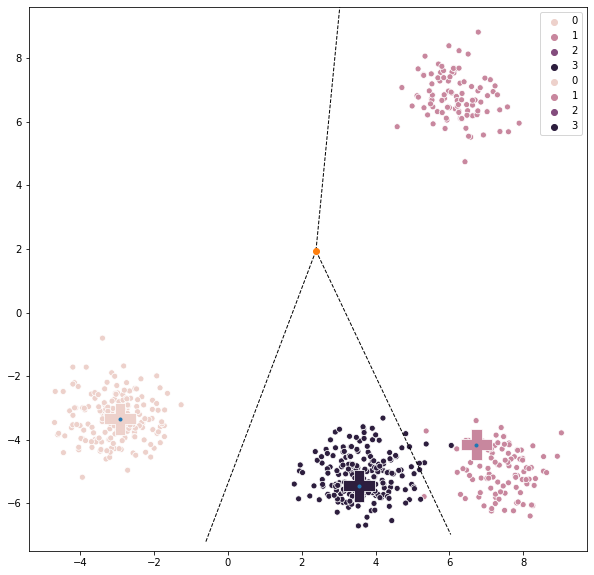

0.9833333333333333

In [5]:
f,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(*X.T,hue=y)
sns.scatterplot(*grlvq.w_.T,hue=grlvq.c_w_, marker='P',s=1000,ax=ax)
yl = plt.ylim()
xl = plt.xlim()
vor = Voronoi(grlvq.w_)
voronoi_plot_2d(vor, show_points=True, show_vertices=True,ax=ax)
ax.set(ylim=yl,xlim=xl)
plt.show()
accuracy_score(grlvq.predict(X),y)